# Aplicando Python para análisis de precios: simulación de escenarios futuros de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

> En la clase anterior vimos como importar datos de activos de la base de datos de Yahoo Finance usando el paquete pandas-datareader. En esta clase, veremos como pronosticar escenarios de evolución de precios, suponiendo que los rendimientos diarios se distribuyen normalmente. Como esta evolución de precios es aleatoria, utilizaremos la simulación montecarlo (hacer muchas simulaciones de escenarios de evolución de precios) para obtener probabilidades de que los precios de cierre estén encima de un valor umbral y tomar decisiones con base en estas probabilidades.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/

## 1. Recordemos como descargar datos...

Antes que nada, para poder hacer simular escenarios de predicción de precios, vamos a recordar lo que hicimos en la clase pasada de descargar los datos de Yahoo Finance, utilizando el paquete `data` de la librería `pandas_datareader`.

Esta vez, utilizaremos los datos de precios de cierre ajustados de activos de la compañía Apple en el año 2016 para nuestra aplicación.

In [2]:
# librerías
import numpy as np #librería numérica
import matplotlib.pyplot as plt #para graficar
%matplotlib inline
import pandas as pd #para crear tablas e importar datos de archivos csv
import pandas_datareader.data as web #para importar datos desde la web

In [5]:
web.DataReader?

In [4]:
datos=web.DataReader('AMZN','yahoo','2017-01-01','2017-12-31')
datos

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983
2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993
2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012
2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990
2017-01-09,801.770020,791.770020,798.000000,796.919983,3446100,796.919983
2017-01-10,798.000000,789.539978,796.599976,795.900024,2558400,795.900024
2017-01-11,799.500000,789.510010,793.659973,799.020020,2992800,799.020020
2017-01-12,814.130005,799.500000,800.309998,813.640015,4873900,813.640015
2017-01-13,821.650024,811.400024,814.320007,817.140015,3791900,817.140015


In [6]:
datos['Adj Close']

Date
2017-01-03     753.669983
2017-01-04     757.179993
2017-01-05     780.450012
2017-01-06     795.989990
2017-01-09     796.919983
2017-01-10     795.900024
2017-01-11     799.020020
2017-01-12     813.640015
2017-01-13     817.140015
2017-01-17     809.719971
2017-01-18     807.479980
2017-01-19     809.039978
2017-01-20     808.330017
2017-01-23     817.880005
2017-01-24     822.440002
2017-01-25     836.520020
2017-01-26     839.150024
2017-01-27     835.770020
2017-01-30     830.380005
2017-01-31     823.479980
2017-02-01     832.349976
2017-02-02     839.950012
2017-02-03     810.200012
2017-02-06     807.640015
2017-02-07     812.500000
2017-02-08     819.710022
2017-02-09     821.359985
2017-02-10     827.460022
2017-02-13     836.530029
2017-02-14     836.390015
                 ...     
2017-11-16    1137.290039
2017-11-17    1129.880005
2017-11-20    1126.310059
2017-11-21    1139.489990
2017-11-22    1156.160034
2017-11-24    1186.000000
2017-11-27    1195.829956
2017-11

In [7]:
def get_closes(names,start_date,end_date):
    return web.DataReader(names,'yahoo',start_date,end_date)['Adj Close']

In [10]:
names=['FB','NFLX','TSLA']
closes=get_closes(names,'2017-01-01','2017-12-31')
closes

Symbols,FB,NFLX,TSLA
Date,,,
2017-01-03,116.860001,127.489998,216.990005
2017-01-04,118.690002,129.410004,226.990005
2017-01-05,120.669998,131.809998,226.750000
2017-01-06,123.410004,131.070007,229.009995
2017-01-09,124.900002,130.949997,231.279999
2017-01-10,124.349998,129.889999,229.869995
2017-01-11,126.089996,130.500000,229.729996
2017-01-12,126.620003,129.179993,229.589996
2017-01-13,128.339996,133.699997,237.750000


## 2. Simulación de rendimientos diarios

Recordemos que los precios diarios de cierre ajustados no son un proceso estocástico estacionario, pero los rendimientos diarios si lo son. Por tanto calculamos los rendimientos a partir de los precios de cierre, obtenemos sus propiedades estadísticas muestrales y proyectamos los rendimientos. Luego, obtenemos la proyección de los precios.

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el cambio porcentual

$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}\approx \ln\left(\frac{S_t}{S_{t-1}}\right)=r_t.
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

Además, supusimos que los rendimientos diarios eran una variable aleatoria con distribución normal (que se caracteriza con su media y varianza). Por tanto obtenemos la media y desviación estandar muestrales. Hagamos una función que retorne lo anterior.

In [11]:
closes.shift()

Symbols,FB,NFLX,TSLA
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,116.860001,127.489998,216.990005
2017-01-05,118.690002,129.410004,226.990005
2017-01-06,120.669998,131.809998,226.750000
2017-01-09,123.410004,131.070007,229.009995
2017-01-10,124.900002,130.949997,231.279999
2017-01-11,124.349998,129.889999,229.869995
2017-01-12,126.089996,130.500000,229.729996
2017-01-13,126.620003,129.179993,229.589996


In [12]:
r=((closes-closes.shift())/closes.shift()).dropna()
r

Symbols,FB,NFLX,TSLA
Date,,,
2017-01-04,0.015660,0.015060,0.046085
2017-01-05,0.016682,0.018546,-0.001057
2017-01-06,0.022707,-0.005614,0.009967
2017-01-09,0.012074,-0.000916,0.009912
2017-01-10,-0.004404,-0.008095,-0.006097
2017-01-11,0.013993,0.004696,-0.000609
2017-01-12,0.004203,-0.010115,-0.000609
2017-01-13,0.013584,0.034990,0.035542
2017-01-17,-0.003662,-0.006058,-0.009127


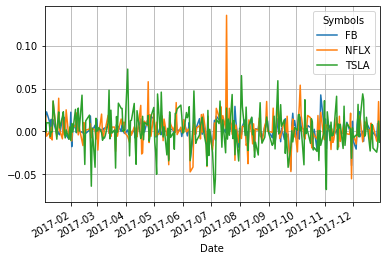

In [13]:
r.plot(grid=True)

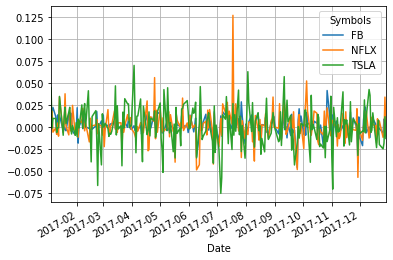

In [14]:
r=np.log(closes/closes.shift()).dropna()
r.plot(grid=True)

In [17]:
closes.pct_change?

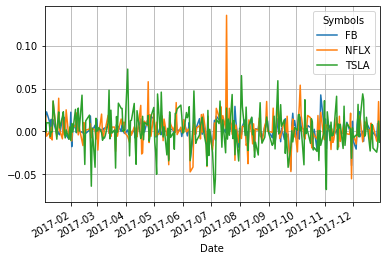

In [18]:
r=closes.pct_change().dropna()
r.plot(grid=True)

Entonces, suponemos que el cambio porcentual de los precios (rendimientos diarios) tiene una distribución normal.

¿Cómo se caracteriza una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal)?

In [38]:
mu=r.mean()
sigma=r.std()

In [39]:
mu

Symbols
FB      0.001707
NFLX    0.001789
TSLA    0.001693
dtype: float64

In [40]:
sigma

Symbols
FB      0.010701
NFLX    0.017564
TSLA    0.022294
dtype: float64

In [22]:
np.random?

In [25]:
np.random.randn?

In [41]:
dias=5
simulaciones=10
media=5
ds=2
ds*np.random.randn(dias,simulaciones)+media

array([[ 3.8262856 ,  6.65319315,  5.9840372 ,  1.95469002,  3.11477468,
         3.14684877,  5.75775934,  9.67839957,  0.99019293,  1.17044252],
       [ 3.83731104,  6.79082818,  8.7337339 ,  4.41690961,  2.44574533,
         6.83102906,  3.07469455,  4.62589542, -0.06521795,  5.96860372],
       [ 3.35301777,  5.39981149,  5.4770249 ,  3.73146741,  6.05911494,
         6.17930967,  6.21952701,  6.65660573,  7.56017789,  1.67026758],
       [ 4.8677944 ,  4.75930934,  3.44797185,  5.46414275,  3.63411474,
         5.94793921,  6.17209421,  8.13926734,  4.96514197,  6.42105157],
       [ 5.3666233 ,  5.21398243,  4.46094433,  3.82195718,  5.40439456,
         7.13662162,  5.81734257,  6.05023262,  3.42878855,  6.42213554]])

In [31]:
pd.date_range?

In [32]:
pd.date_range('2018-01-01',periods=5,freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

In [42]:
mu['FB'],sigma['FB']

(0.0017069667975224325, 0.010700618739366152)

Habiendo caracterizado los rendimientos diarios como una variable aleatoria normal con la media y la varianza muestral obtenida de los datos del 2018, podemos generar números aleatorios con estas características para simular el comportamiento de los precios de cierre de las acciones en el 2019 (hay un supuesto de que las cosas no cambiarán fundamentalmente).

Sin embargo, cada simulación que hagamos nos conducirá a distintos resultados (los precios siguen evolucionando aleatoriamente). Entonces, lo que haremos es simular varios escenarios para así ver alguna tendencia y tomar decisiones.

Hagamos una una función que simule varios escenarios de rendimientos diarios y que devuelva un dataframe con esta simulación.

In [43]:
# Función que simula varios escenarios de rendimientos diarios
def sim_r(mu,sigma,start_date,ndays,N):
    dates=pd.date_range(start_date,periods=ndays,freq='D')
    return pd.DataFrame(index=dates,data=mu+sigma*np.random.randn(ndays,N))

In [44]:
# Simulamos 100 escenarios para todo el 2018
sim_FB=sim_r(mu['FB'],sigma['FB'],'2018-01-01',365,100)

In [45]:
# Mostrar
sim_FB

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2018-01-01,0.020289,-0.002779,-0.007990,0.016926,-0.000834,0.007866,-0.000912,0.001629,-0.010482,-0.021121,...,0.004215,-0.012889,-0.004386,-0.002422,0.022255,0.024417,-0.005103,-0.005667,0.007985,-0.003911
2018-01-02,0.002018,0.007692,-0.001621,0.005124,-0.001525,0.012912,0.002864,0.007621,-0.006019,-0.002003,...,0.009349,-0.004792,0.009063,0.001506,-0.011398,0.000661,-0.018385,-0.006942,-0.009516,-0.007831
2018-01-03,0.012408,0.024005,0.005350,0.006171,-0.000978,-0.020623,0.005787,0.002590,0.008212,0.002250,...,-0.005708,-0.010407,0.014048,0.006086,-0.002367,0.005618,0.016001,-0.005849,0.034703,0.012404
2018-01-04,0.011114,0.021989,-0.015752,-0.003258,0.000761,0.007536,-0.006563,-0.010393,0.009839,-0.000146,...,-0.001707,0.008606,0.008306,-0.011891,0.018988,0.003310,0.002749,0.004975,0.001892,0.002955
2018-01-05,0.010354,0.012229,0.003544,-0.001880,-0.014160,0.010003,-0.000907,0.009218,0.018651,0.003184,...,0.008529,-0.007281,0.022415,-0.011370,0.003165,0.002665,-0.007091,0.007191,0.019839,-0.011218
2018-01-06,0.001954,0.007558,0.000223,0.008035,-0.004545,-0.007609,0.001378,0.002853,0.002049,-0.018677,...,-0.013736,0.007200,0.010734,0.007870,0.000045,0.021651,0.012683,-0.007087,0.011976,-0.005749
2018-01-07,0.013849,-0.002630,0.004125,0.004765,0.015971,0.008047,0.000524,0.004498,-0.001698,0.007030,...,0.000062,-0.010600,-0.009371,-0.007237,0.010554,0.022177,-0.000717,0.021807,0.002915,0.008390
2018-01-08,0.006031,-0.007729,-0.014305,0.000140,0.012964,-0.005945,0.011801,0.019724,0.000222,-0.001407,...,-0.012137,0.002992,-0.000392,-0.014814,0.003503,0.003727,-0.003063,-0.012001,0.002482,0.012336
2018-01-09,-0.003347,-0.003897,-0.007079,0.000821,0.001293,-0.005038,0.011839,0.005356,-0.003026,-0.000411,...,0.010202,-0.020162,-0.008213,0.003995,0.012978,0.007216,-0.003556,0.010093,0.012492,0.009106
2018-01-10,0.026295,-0.003195,-0.000731,-0.004792,0.005336,0.014170,-0.003636,-0.009259,0.003379,0.018244,...,0.016745,0.018272,-0.005264,-0.011140,-0.010757,0.003634,0.007569,0.011550,0.007317,0.001110


## 3. Proyección de precios de cierre

Por tanto, para calcular los precios, tenemos:

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$, donde $p_{-1}$ es el último precio reportado en el 2018.

In [36]:
pd.DataFrame.cumprod?

Con los rendimientos, calculamos los precios de cierre...

In [46]:
simCloses_FB=closes['FB'].iloc[-1]*(1+sim_FB).cumprod()
simCloses_FB

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2018-01-01,180.040249,175.969613,175.050138,179.446741,176.312775,177.847986,176.299141,176.747460,174.610429,172.732983,...,177.203824,174.185623,175.686129,176.032543,180.387211,180.768719,175.559495,175.459957,177.869000,175.769798
2018-01-02,180.403547,177.323154,174.766323,180.366178,176.043899,180.144376,176.804094,178.094531,173.559462,172.386973,...,178.860551,173.350972,177.278375,176.297635,178.331113,180.888140,172.331751,174.241909,176.176332,174.393372
2018-01-03,182.642006,181.579777,175.701259,181.479268,175.871802,176.429294,177.827189,178.555739,174.984770,172.774814,...,177.839615,171.546881,179.768847,177.370665,177.909055,181.904395,175.089239,173.222842,182.290143,176.556504
2018-01-04,184.671964,185.572515,172.933625,180.887937,176.005584,177.758858,176.660187,176.699941,176.706365,172.749571,...,177.535981,173.023141,181.262062,175.261599,181.287182,182.506585,175.570572,174.084545,182.635078,177.078220
2018-01-05,186.584138,187.841921,173.546506,180.547862,173.513371,179.537054,176.500021,178.328807,180.002124,173.299685,...,179.050244,171.763334,185.325098,173.268950,181.860916,182.993009,174.325639,175.336401,186.258458,175.091686
2018-01-06,186.948652,189.261696,173.585173,181.998548,172.724737,178.170873,176.743266,178.837526,180.371014,170.062916,...,176.590759,172.999983,187.314446,174.632595,181.869097,186.955075,176.536670,174.093860,188.489114,174.085119
2018-01-07,189.537766,188.763845,174.301172,182.865860,175.483294,179.604566,176.835807,179.641874,180.064753,171.258501,...,176.601703,171.166178,185.559044,173.368749,183.788506,191.101148,176.410107,177.890347,189.038648,175.545632
2018-01-08,190.680798,187.304877,171.807741,182.891496,177.758241,178.536895,178.922666,183.185150,180.104665,171.017555,...,174.458304,171.678328,185.486366,170.800504,184.432305,191.813316,175.869690,175.755521,189.507829,177.711157
2018-01-09,190.042534,186.574997,170.591436,183.041603,177.988052,177.637484,181.040938,184.166279,179.559758,170.947196,...,176.238070,168.216956,183.962892,171.482854,186.825859,193.197374,175.244242,177.529340,191.875239,179.329454
2018-01-10,195.039622,185.978983,170.466733,182.164391,178.937778,180.154616,180.382747,182.461052,180.166406,174.065951,...,179.189256,171.290697,182.994572,169.572532,184.816246,193.899484,176.570595,179.579795,193.279102,179.528429


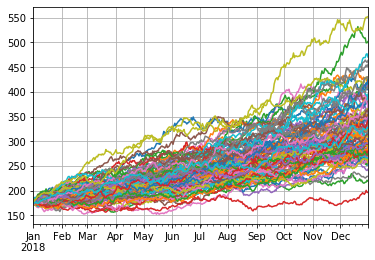

In [47]:
simCloses_FB.plot(grid=True,legend=False)

In [48]:
def simCloses(data,mu,sigma,start_date,ndays,N):
    simR=sim_r(mu,sigma,start_date,ndays,N)
    return data*(1+simR).cumprod()

In [49]:
simCloses(closes['NFLX'].iloc[-1],mu['NFLX'],sigma['NFLX'],'2018-01-01',365,100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2018-01-01,192.736143,193.108262,192.544690,191.901494,196.632253,192.584397,195.130210,191.544218,195.540407,195.766991,...,190.677887,200.440309,185.815086,191.444443,194.208732,193.641149,194.858558,192.952030,192.739034,192.914268
2018-01-02,186.250911,199.382588,192.245071,195.155938,198.178299,195.758191,192.882096,195.961335,197.221012,196.620106,...,188.725675,203.804934,185.709643,188.862680,194.795801,196.139152,194.241722,192.496549,189.738842,192.525586
2018-01-03,193.367623,204.029345,194.346940,198.648423,198.335939,199.000860,194.384808,196.177437,196.786701,197.113476,...,182.763583,212.750875,190.297267,192.787600,195.159854,193.024273,196.417460,195.812873,189.433840,194.510130
2018-01-04,198.017238,200.983258,190.641104,197.718168,197.145672,202.410542,199.585380,190.609217,197.275176,197.497396,...,182.640396,216.341176,184.028958,195.108834,197.756506,197.304854,200.121439,193.463198,190.837177,189.969030
2018-01-05,207.606386,203.139587,191.415049,197.309445,191.416675,202.070003,205.138512,194.242428,193.086841,199.021353,...,182.654238,214.474116,184.321784,195.713271,197.830771,200.014684,195.700160,192.983256,188.032811,195.008728
2018-01-06,203.788876,203.079734,197.221809,199.650104,189.302768,203.432639,200.362466,191.770528,193.353895,199.573613,...,176.397181,211.166048,183.681369,199.783833,200.658714,201.028992,195.223749,198.156267,188.264729,194.848449
2018-01-07,202.947480,206.868741,202.192895,198.963916,192.449197,199.435208,197.637931,188.843249,192.758526,199.732243,...,177.996459,213.634065,187.014410,197.563571,206.674141,202.795374,197.435161,193.193674,186.169635,188.933370
2018-01-08,197.765409,201.561941,200.100705,198.181745,190.437746,201.625037,193.599631,195.130755,197.265931,201.322520,...,180.638676,214.765560,181.292235,195.565796,201.915712,207.701560,196.112188,198.274147,184.113367,191.540370
2018-01-09,192.767140,201.881245,200.567651,198.987840,189.524087,200.917987,195.274830,198.488516,196.219827,201.502682,...,180.246827,214.876309,178.197835,199.328475,203.016108,212.244707,199.855329,202.788261,181.420926,194.059519
2018-01-10,188.054876,204.966898,200.408626,198.462873,189.204597,196.438339,196.927278,194.982351,198.959576,202.896361,...,185.576393,216.035085,180.083340,194.065354,201.896665,209.343904,201.352099,209.015108,183.281927,195.638903


## 4. Probabilidad Precio-Umbral

Ya que tenemos muchos escenarios de precios proyectados, podemos ver varias cosas. Por ejemplo, ¿cuál es la probabilidad de que el precio de cierre sobrepase algún valor umbral en algún momento?

In [52]:
# Umbral de 120% del ultimo precio
Umbral=closes['FB'].iloc[-1]*1.2
# Fechas
start_date='2018-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
# DataFrame de Umbrales
DF_Umbral=pd.DataFrame(index=dates,data=np.ones(365)*Umbral)
DF_Umbral
# Concatenar y graficar


,0
2018-01-01,211.752008
2018-01-02,211.752008
2018-01-03,211.752008
2018-01-04,211.752008
2018-01-05,211.752008
2018-01-06,211.752008
2018-01-07,211.752008
2018-01-08,211.752008
2018-01-09,211.752008
2018-01-10,211.752008


In [ ]:
# Comparar cada escenario en cada fecha

# Sumamos para cada fecha y dividimos entre el número de escenarios

# Gráfico de probabilidad


___
Entonces, ya aprendimos a bajar datos con pandas-datareader. En específico, a partir de los precios de cierre ajustados obtuvimos los rendimientos diarios.

Suponiendo que los rendimientos diarios son un proceso estocástico estacionario de distribución normal, pudimos caracaterizarlo y proyectar varios escenarios de evolución de los precios (montecarlo).

Con estas proyecciones pudimos calcular probabilidades de sobrepasar cierto precio umbral: toma de decisiones.